## Python statistics essential training - 04_04_testing

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pumps = pd.read_csv('pumps.csv')

In [5]:
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [6]:
cholera = pd.read_csv('cholera.csv')

In [8]:
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


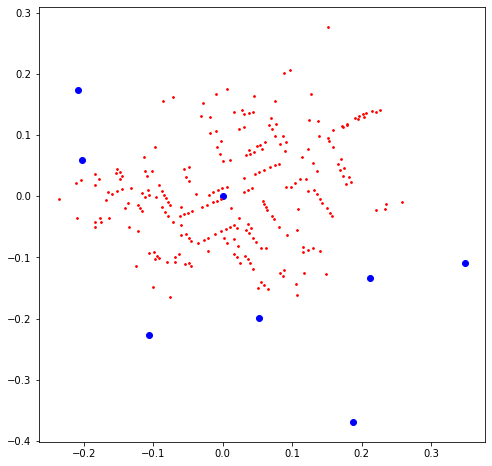

In [11]:
pp.figure(figsize=(8,8))
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=3)

In [13]:
img = matplotlib.image.imread('london.png')

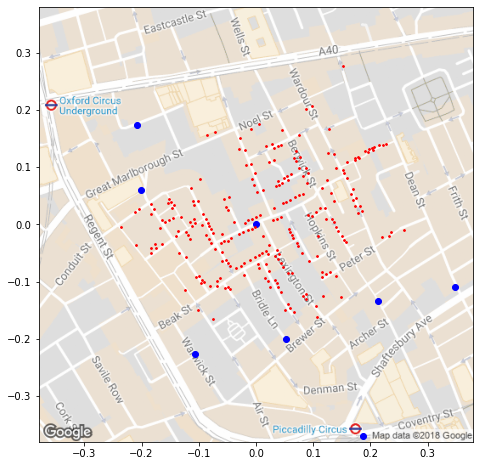

In [20]:
pp.figure(figsize=(8,8))
pp.imshow(img, extent=[-0.38, 0.38, -0.38, 0.38])
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=3)

In [39]:
cholera.closest.value_counts()


0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [40]:
cholera.closest.value_counts(normalize=True)


0    0.684
1    0.144
4    0.076
5    0.052
7    0.036
2    0.008
Name: closest, dtype: float64

In [41]:
cholera.groupby('closest').deaths.sum()


closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [42]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0, 1, 4, 5], size=n, p=[0.65, 0.15, 0.10, 0.10])})

In [43]:
simulate(489).closest.value_counts()

0    315
1     63
4     57
5     54
Name: closest, dtype: int64

In [47]:
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(1000)]})


<AxesSubplot:>

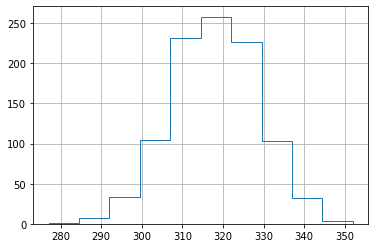

In [48]:
sampling.counts.hist(histtype='step')

In [51]:
scipy.stats.percentileofscore(sampling.counts, 340)

98.55

In [53]:
100-98.55

1.4500000000000028